# Exercício 03
## Seleção de variáveis
### Alunos:

 - Lucas Henrique Mantovani Jacintho - 10258942
 - Victor Luiz Fortes Rivelo - 9762960
 - Vinicius Henrique Borges - 9771546


---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [1]:
import pandas as pd

dataset = pd.read_csv('/content/dataset_hepatitis.csv', na_values='?')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         



---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [0]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = X.select_dtypes(include=['number']).columns
categoric_features = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline(
    steps=[
           ('imputer', SimpleImputer(strategy='mean')),
           ('scaler', StandardScaler())
])

categoric_pipeline = Pipeline(
    steps=[
           ('imputer', SimpleImputer(strategy='most_frequent')),
           ('onehot', OneHotEncoder())
])

transformation = ColumnTransformer(
    transformers=[
                  ('numeric transformation', numeric_pipeline, numeric_features),
                  ('categoric transformation', categoric_pipeline, categoric_features),
    ])

transformed_dataset = transformation.fit_transform(X)

In [4]:
transformed_dataset.round(2)

array([[-0.89, -0.36, -0.44, ...,  0.  ,  1.  ,  0.  ],
       [ 0.7 , -0.45,  0.64, ...,  0.  ,  1.  ,  0.  ],
       [ 2.94, -0.61, -0.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.58, -0.53, -0.66, ...,  0.  ,  0.  ,  1.  ],
       [ 0.94,  0.06, -0.53, ...,  1.  ,  0.  ,  1.  ],
       [ 0.14, -0.19, -0.12, ...,  0.  ,  0.  ,  1.  ]])



---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

In [0]:
import numpy as np

In [0]:
transformed_dataset = np.c_[transformed_dataset, dataset['Class']]

In [0]:
names = []
# Variáveis numéricas não tem alteração de tamanho, logo:
names = names + list(numeric_features)

# Para os dados categóricos devemos acessar o transformador:
categoric_transformation = transformation.transformers_[1]
# Depois o pipeline
categoric_pipeline = categoric_transformation[1]
# E finalmente o onehot
onehot_transf = categoric_pipeline.named_steps['onehot']
# Para acessar o nome das variáveis usamos o método get_feature_names()
names = names + (onehot_transf.get_feature_names(categoric_features).tolist())

names.append("Class")

processed_dataframe = pd.DataFrame(data=transformed_dataset, columns=names)

Escolhemos obter a medida de correlação entre as variáveis por considerarmos que ela melhor representa a importância das variáveis para classificar o conjunto de dados, de modo que daremos foco à correlação da variável alvo  (classe) com todas as outras variáveis (atributos).

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


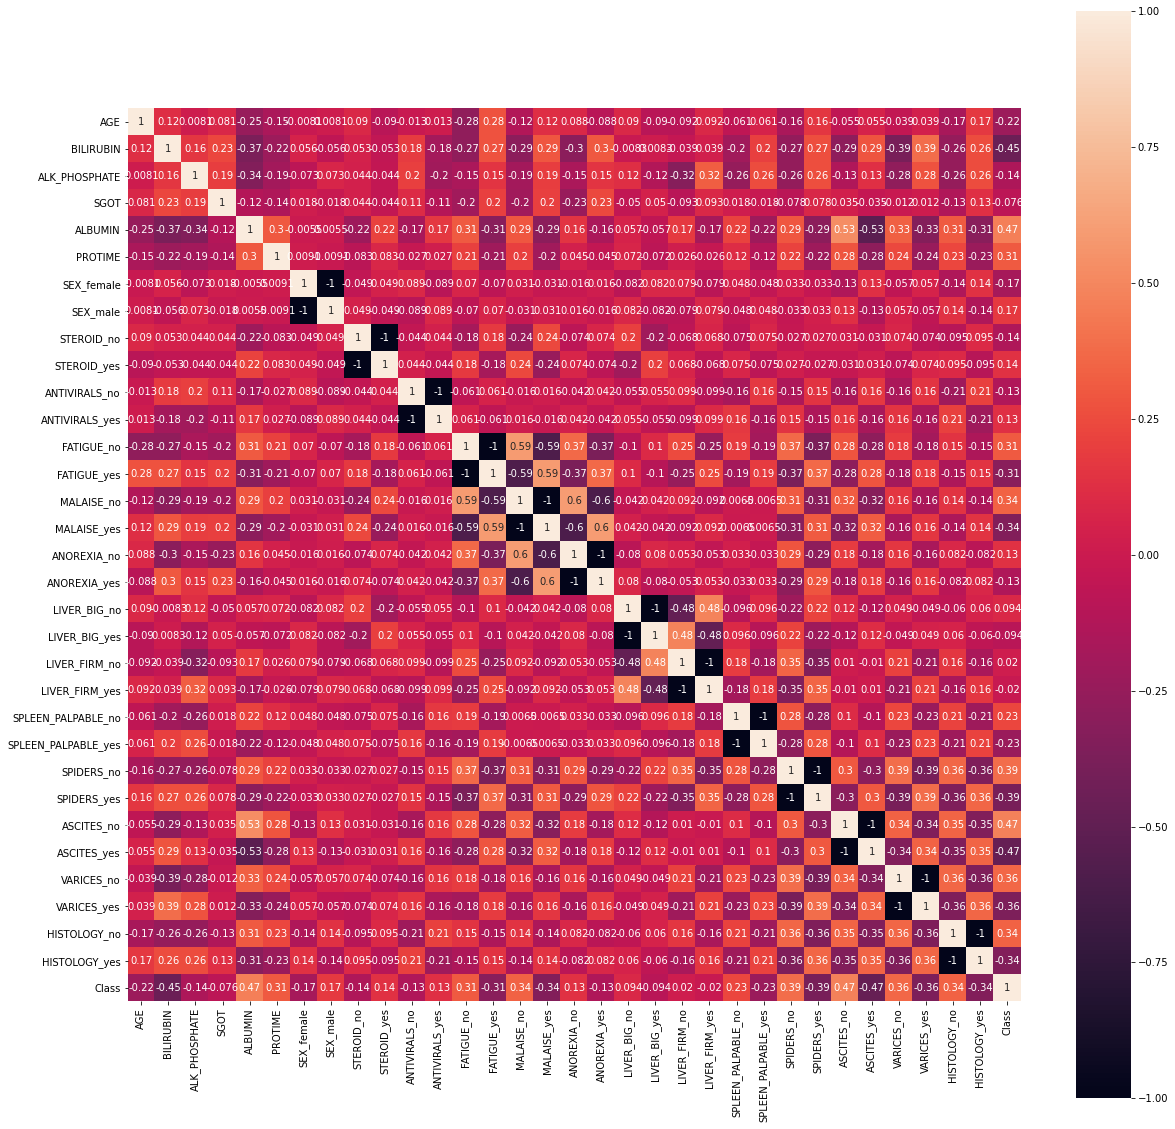

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))

corr = processed_dataframe.corr()
ax = sns.heatmap(corr, annot=True, square=True)

Imprimindo as colunas em ordem decrescente de correlação entre todos os atributos e a variável alvo:

In [9]:
sorted_columns = corr['Class'].abs().sort_values(ascending=False)
sorted_columns

Class                  1.000000
ASCITES_yes            0.469334
ASCITES_no             0.469334
ALBUMIN                0.465827
BILIRUBIN              0.450470
SPIDERS_no             0.389137
SPIDERS_yes            0.389137
VARICES_no             0.362385
VARICES_yes            0.362385
MALAISE_yes            0.339530
MALAISE_no             0.339530
HISTOLOGY_no           0.337856
HISTOLOGY_yes          0.337856
PROTIME                0.307238
FATIGUE_no             0.306049
FATIGUE_yes            0.306049
SPLEEN_PALPABLE_no     0.234261
SPLEEN_PALPABLE_yes    0.234261
AGE                    0.219647
SEX_female             0.173051
SEX_male               0.173051
ALK_PHOSPHATE          0.141005
STEROID_no             0.137413
STEROID_yes            0.137413
ANOREXIA_yes           0.133638
ANOREXIA_no            0.133638
ANTIVIRALS_yes         0.130196
ANTIVIRALS_no          0.130196
LIVER_BIG_no           0.093665
LIVER_BIG_yes          0.093665
SGOT                   0.075579
LIVER_FI

Seleção das variáveis com maior correlação.

In [10]:
columns = ['ASCITES_yes', 'ALBUMIN', 'BILIRUBIN', 'SPIDERS_no', 'VARICES_no',
           'MALAISE_yes', 'HISTOLOGY_no', 'PROTIME', 'FATIGUE_no',
           'SPLEEN_PALPABLE_no']
columns

['ASCITES_yes',
 'ALBUMIN',
 'BILIRUBIN',
 'SPIDERS_no',
 'VARICES_no',
 'MALAISE_yes',
 'HISTOLOGY_no',
 'PROTIME',
 'FATIGUE_no',
 'SPLEEN_PALPABLE_no']



---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [0]:
corr_data = processed_dataframe[columns]



---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

In [12]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca_data = pca.fit_transform(processed_dataframe)

print(pca.explained_variance_ratio_.cumsum())

[0.24946072 0.34848335 0.43981222 0.5238242  0.60026689 0.6638925
 0.72042734 0.76492821 0.80790549 0.84599114 0.87360305 0.89510774
 0.91468744 0.93212634 0.94855348 0.9618901  0.97394614 0.98435331
 0.99330261 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


In [13]:
pd.DataFrame(pca_data[:, :9])

,0,1,2,3,4,5,6,7,8
0,-1.490760,0.095617,-0.569453,0.500920,0.160216,0.332993,-0.371924,-1.105664,0.617136
1,-0.053039,-0.606274,-0.681152,-0.776559,0.087512,0.045441,-0.741376,-0.321003,0.947473
2,-0.464623,-2.427192,0.184309,-1.433419,0.363295,-0.824171,0.235310,1.247826,0.842385
3,-2.370046,-0.093028,0.265845,0.594051,-0.294253,-0.326276,-0.435059,0.107924,-0.361830
4,-0.953733,0.946860,0.911306,0.028607,1.037374,-0.890466,-0.427521,0.226537,-0.069592
...,...,...,...,...,...,...,...,...,...
150,4.281620,0.370006,2.735194,2.463587,-1.477404,-1.478422,1.433677,0.098865,0.497541
151,-0.220134,0.484214,0.146318,-1.011705,0.636401,-0.488299,0.699883,0.194415,-0.483434
152,0.309175,-1.593541,-0.394714,-1.423756,-0.621673,1.113129,0.990364,-0.517869,-0.520474
153,0.510242,-1.384308,-0.523159,0.173358,0.279948,0.103171,1.072942,-0.539395,-0.200516




---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia?

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))

In [15]:
%time model_tester(transformed_dataset, y)
print()
%time model_tester(corr_data, y)
print()
%time model_tester(pca_data[:, :9], y)
print()
%time model_tester(pca_data[:, :13], y)
print()
%time model_tester(pca_data[:, :20], y);

Score do classificador: 89.00
CPU times: user 5 s, sys: 2.81 ms, total: 5.01 s
Wall time: 5.02 s

Score do classificador: 87.04
CPU times: user 2.82 s, sys: 0 ns, total: 2.82 s
Wall time: 2.82 s

Score do classificador: 84.42
CPU times: user 4.33 s, sys: 1.92 ms, total: 4.33 s
Wall time: 4.33 s

Score do classificador: 82.54
CPU times: user 3.85 s, sys: 3.01 ms, total: 3.85 s
Wall time: 3.85 s

Score do classificador: 95.46
CPU times: user 3.76 s, sys: 1.06 ms, total: 3.76 s
Wall time: 3.77 s


Assim como esperado do algoritmo PCA após a transformação dos dados temos a redução da dimensionalidade do conjunto original, com a característica de manter a variância, neste caso superior a 80%, como demonstrado nos testes obtivemos casos onde a acurária reduz porém de forma amortizada, dado que fizemos um corte do conjunto. Como conclusão final, podemos analisar que obtivemos ganhos enormes, basta relembrar da maldição da dimensionalidade, considerando espaço de armazenamento, tempo de processamento, entre outros problemas, então conseguir reduzir a dimensionalidade e manter as acurárias em valores próximos ao conjunto original é sensacional!